In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
import scipy.io
import os
from google.colab import drive

In [ ]:

def sigmoid(z):
    return 1 / (1 + np.exp(z))

def diff_sigmoid(z):
    return -np.exp(z) / (1 + np.exp(z))**2

def relu(z):
    return np.maximum(z,0)

def diff_relu(z):
    return np.where(z>0, 1, 0)



In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/machine learning/hw2/'
file_path1 = file_path + 'data21.mat'

# Define the file path
#file_path = '/data21.mat'

if os.path.exists(file_path1):
    mat_data = scipy.io.loadmat(file_path1)
    print("File loaded successfully!")

else:
    print(f"Error: File not found at {file_path1}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully!


In [ ]:
# Πρόσβαση στα δεδομένα
A1 = mat_data['A_1']
A2 = mat_data['A_2']
B1 = mat_data['B_1']
B2 = mat_data['B_2']
# Εμφάνιση των διαστάσεων των δεδομένων
print("A1 dimensions:", A1.shape)
print("A2 dimensions:", A2.shape)
print("B1 dimensions:", B1.shape)
print("B2 dimensions:", B2.shape)

A1 dimensions: (128, 10)
A2 dimensions: (784, 128)
B1 dimensions: (128, 1)
B2 dimensions: (784, 1)


In [ ]:
def forward_NN(Z):
    W1 = np.dot(A1, Z) + B1
    Z1 = relu(W1)
    W2 = np.dot(A2, Z1) + B2
    Z2 = sigmoid(W2)
    return Z2,W2,Z1,W1


In [ ]:

# Generate 100 realizations of Z and apply the generator
num_realizations = 100
generated_images = []

for _ in range(num_realizations):
    Z = np.random.normal(loc=0, scale=1, size=(10, 1))
    X = forward_NN(Z)[0]
    generated_images.append(X)


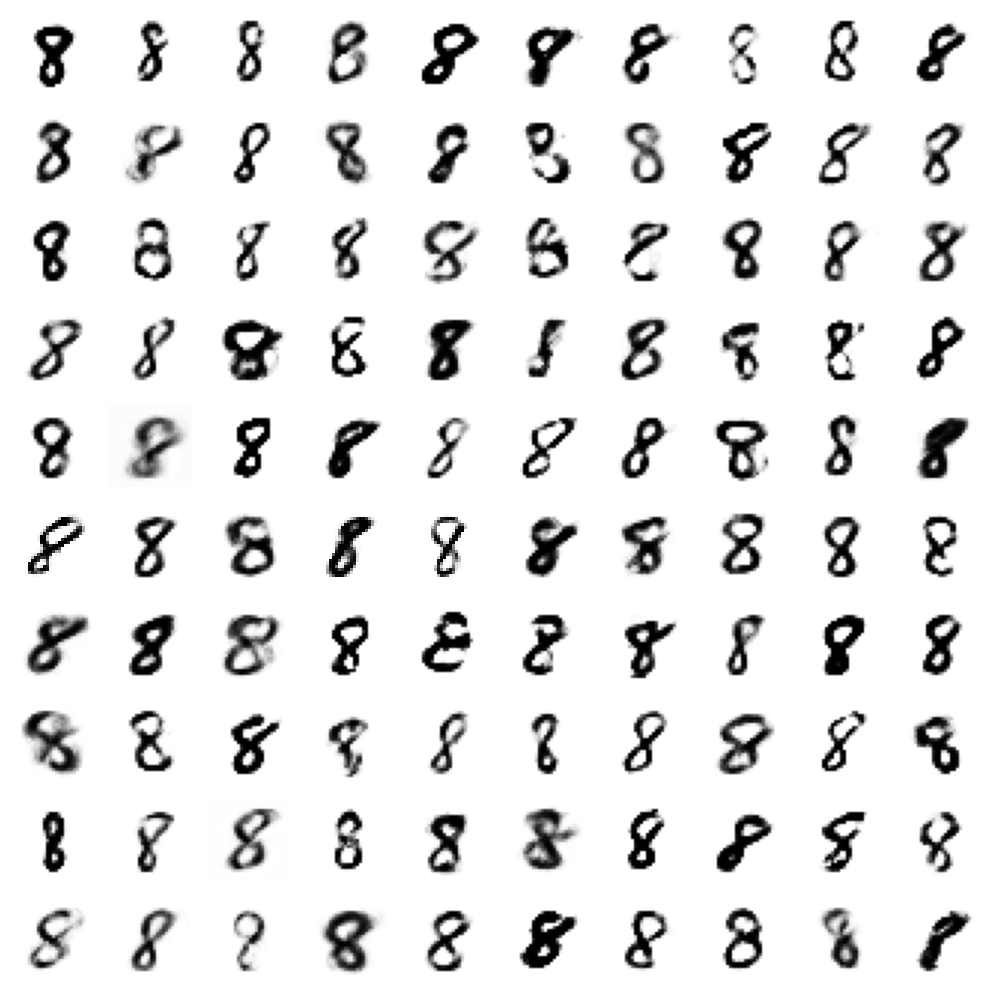

In [ ]:
# Assuming 'generated_images' is a list of 100 784x1 vectors
fig, axes = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        image_index = i * 10 + j
        image_2d = np.reshape(generated_images[image_index], (28, 28)).T
        axes[i, j].imshow(image_2d, cmap='gray')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from math import e

class GAN:
    def __init__(self, Xn, T, N=784, gd_loops=2000, method = "inpainting"):
        self.costs=np.zeros((gd_loops+1))
        if method == "inpainting":
            self.Xn= Xn[:N]
        else:
            self.Xn=np.dot(T,Xn)
        #print(self.Xn.shape)
        self.T = T
        self.N = N
        self.gd_loops = gd_loops

        self.Z = np.random.normal(loc=0, scale=1, size=(10, 1))
        self.X = forward_NN(self.Z)[0]
        #self.Z_array = np.zeros((gd_loops+1))
        #self.Z_array[0] = self.Z

    # φ(X) = log(norm(T*X-Xn)^2)

    # κλήση της φ(X) ως προς Z

        return phi+g(y)
    def grad_phi_z(self):
        self.X, W2,_, W1 = forward_NN(self.Z)

        matrix = np.dot(self.T,X)-self.Xn
        # grad_phi_x
        u2 = np.dot(2*self.T.T,matrix)/(np.linalg.norm(matrix)**2)
        v2 = u2*diff_sigmoid(W2)
        u1 = np.dot(A2.T, v2)
        v1 = u1*diff_relu(W1)
        u0 = np.dot(A1.T, v1)
        return u0

    def J(self):
        phi = np.log(np.linalg.norm(np.dot(self.T,self.X)-self.Xn)**2)
        return self.N*phi+np.linalg.norm(self.Z)**2

    def gradient_J(self):
        return self.N*self.grad_phi_z()+2*self.Z

    def GD(self, lr=0.0005):
        best_Z=self.Z
        best_cost = float('inf')
        cost = self.J()
        self.costs[0]=cost
        for i in range (self.gd_loops):
            self.Z = self.Z - lr*self.gradient_J()
            cost = self.J()
            self.costs[i+1]=cost
            if cost<best_cost:
                best_cost = cost
                best_Z = self.Z
        return best_cost, best_Z
        #     self.Z = self.Z - lr*self.gradient_J()
        #     if test_opt == True:
        #       if best_cost>=cost:
        #           flag=0
        #           best_Z=self.Z
        #           best_cost = cost
        #       elif cost-best_cost>0.5:
        #           flag+=1
        #           if flag==500:
        #             self.costs[i+2]=best_cost
        #             self.costs=self.costs[:i+2]
        #             return best_cost, best_Z
        #     self.costs[i+1]=cost
        #     cost=self.J()
        # self.Z=best_Z
        # self.costs[-1]=best_cost
        # self.costs=self.costs
        #return best_cost, best_Z




In [ ]:
file_path2 = file_path + 'data22.mat'

if os.path.exists(file_path2):
    mat_data2 = scipy.io.loadmat(file_path2)
    print("File loaded successfully!")
else:
    print(f"Error: File not found at {file_path2}")

# prompt: θέλω τα keys το mat_data 'X_i', 'X_n' σε 2 vectors Xi, Xn

Xi = mat_data2['X_i']
Xi_split = np.split(Xi, 4, axis=1)
Xn = mat_data2['X_n']
Xn_split = np.split(Xn, 4, axis=1)

# prompt: 2 matrix T has dimensions N × 784 and is
# of the form T = [I 0] where I is the identity matrix of size N × N and 0 a zero matrix of size
# N × (784 − N). (N=500)

N = 500
I = np.identity(N)
zero_matrix = np.zeros((N, 784 - N))
T = np.concatenate((I, zero_matrix), axis=1)

File loaded successfully!


0 0 best 1871.7820621267892
0 1 best 1543.9162112354572
1 0 best 1435.8363118617171
2 0 best 1970.967326423265
2 1 best 1856.4415345590132
3 0 best 1725.593857364474


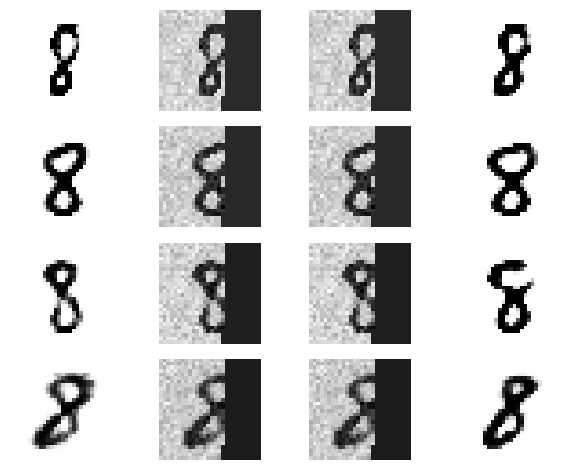

In [ ]:

# Generate images using the optimized Z
optimized_generated_images = []
num_realizations = 4
fig, axes = plt.subplots(4, 4)
final_costs_list = []
for i in range(4):
    gans = []
    best_cost = float('inf')
    for j in range(3):
        gan = GAN(Xn_split[i], T, N=N, gd_loops=3000)
        gan.GD()
        cost = np.mean(gan.costs[-10:])
        if best_cost>cost:
          best_cost = cost
          z_opt = gan.Z
          X = forward_NN(z_opt)[0]
          final_costs = gan.costs
          print(i, j, "best", best_cost)
    final_costs_list.append(final_costs)
    image_2d = np.reshape(Xi_split[i], (28, 28)).T
    axes[i, 0].imshow(image_2d, cmap='gray')
    axes[i, 0].axis('off')

    image_2d = np.reshape(Xn_split[i], (28, 28)).T
    axes[i, 1].imshow(image_2d, cmap='gray')
    axes[i, 1].axis('off')

    Xn_split[i][N:, :] = 0
    image_2d = np.reshape(Xn_split[i], (28, 28)).T
    axes[i, 2].imshow(image_2d, cmap='gray')
    axes[i, 2].axis('off')


    image_2d = np.reshape(X, (28, 28)).T
    axes[i, 3].imshow(image_2d, cmap='gray')
    axes[i, 3].axis('off')





plt.tight_layout()
plt.show()

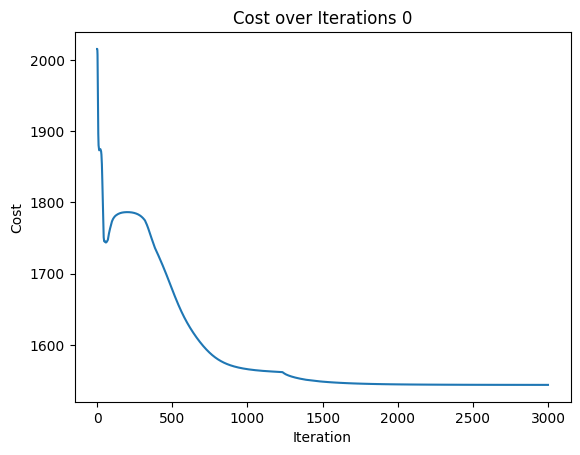

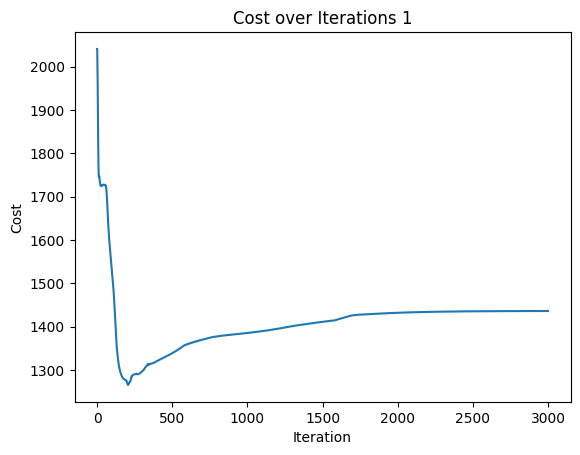

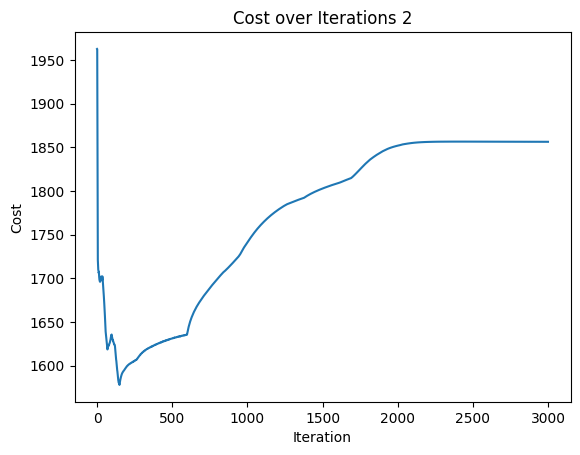

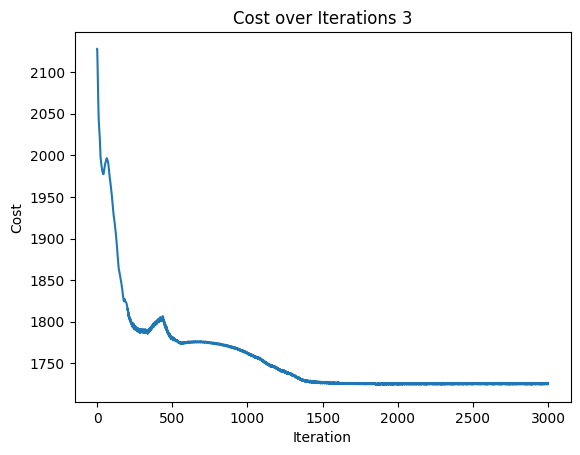

In [ ]:
for i in range(4):
    costs = final_costs_list[i][:-1]
    #print(costs)
    #print(costs[:10])
    #x=costs[:10]
    #print(gan[i].costs)
    #print(x)
    #print(np.mean(x))
    # for j in range(len(costs)):
    #     if j<20:
    #         x = costs[:j+1]
    #         #print(x)
    #         mean=np.mean(x)
    #         costs[j]=mean
    #         #print(costs[j])
    #     else:
    #         costs[j] = np.mean((costs[j-20:j+1]))
    # Δημιουργία διαγράμματος
    plt.plot(range(len(costs)),costs)
    #print(gan[i].costs[:10])
    # Προσθήκη τίτλων και ετικετών
    plt.title('Cost over Iterations {}'.format(i))
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()


In [ ]:
file_path3 = file_path + 'data23.mat'

if os.path.exists(file_path2):
    mat_data3 = scipy.io.loadmat(file_path2)
    print("File loaded successfully!")
else:
    print(f"Error: File not found at {file_path2}")

File loaded successfully!


In [ ]:
# prompt: θέλω τα keys το mat_data 'X_i', 'X_n' σε 2 vectors Xi, Xn

Xi2 = mat_data3['X_i']
Xi_split2 = np.split(Xi2, 4, axis=1)
Xn = mat_data3['X_n']
Xn_split2 = np.split(Xn, 4, axis=1)
for i in range(4):
  print(Xn_split2[i].shape)

(784, 1)
(784, 1)
(784, 1)
(784, 1)


In [ ]:
def create_diagonal_matrix(A, N):
    n,m = A.shape
    # print(A)
    # print(A.shape)
    diagonal_matrix = np.zeros((N * n, N * m))
    for i in range(N):
        start_n = i * n
        start_m = i * m
        diagonal_matrix[start_n:start_n + n, start_m:start_m + m] = A
    return diagonal_matrix

# Παράδειγμα χρήσης
ones = np.ones((1,4))
T3 = create_diagonal_matrix(ones,7)
print(T3.shape)
T3 = np.tile(T3,(1,4))
T3 = create_diagonal_matrix(T3,7)
T3=T3/16
print(T3.shape)
N=49

(7, 28)
(49, 784)


In [ ]:
# prompt: use GAN with the above parameters

gan2 =[GAN(Xn_split2[0], T3, gd_loops=5000, N=N, method=0),
       GAN(Xn_split2[1], T3, gd_loops=5000, N=N, method=0),
       GAN(Xn_split2[2], T3, gd_loops=5000, N=N, method=0),
       GAN(Xn_split2[3], T3, gd_loops=5000, N=N, method =0)]

i, j 0 0
cost 0.0
best 0.0
i, j 0 1
cost 0.0
best 0.0
i, j 0 2
cost 0.0
best 0.0
i, j 0 3
cost 0.0
best 0.0
i, j 0 4
cost 0.0
best 0.0
i, j 1 0
cost 0.0
best 0.0
i, j 1 1
cost 0.0
best 0.0
i, j 1 2
cost 0.0
best 0.0
i, j 1 3
cost 0.0
best 0.0
i, j 1 4
cost 0.0
best 0.0
i, j 2 0
cost 0.0
best 0.0
i, j 2 1
cost 0.0
best 0.0
i, j 2 2
cost 0.0
best 0.0
i, j 2 3
cost 0.0
best 0.0
i, j 2 4
cost 0.0
best 0.0
i, j 3 0
cost 0.0
best 0.0
i, j 3 1
cost 0.0
best 0.0
i, j 3 2
cost 0.0
best 0.0
i, j 3 3
cost 0.0
best 0.0
i, j 3 4
cost 0.0
best 0.0


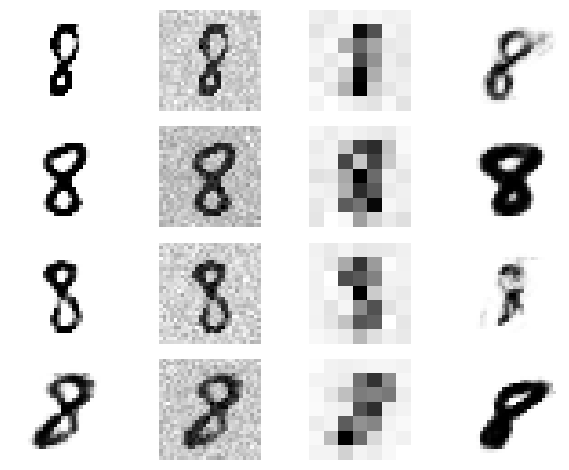

In [ ]:

# Generate images using the optimized Z
optimized_generated_images = []
num_realizations = 4
fig, axes = plt.subplots(4, 4)
final_costs_list = []
for i in range(4):
    best_cost = float('inf')
    for j in range(5):
        print("i, j",i, j)
        gan3 = GAN(Xn_split2[i], T3, N=N, gd_loops=1000, method = 0)
        gan3.GD()
        cost = np.mean(gan3.costs[-10:])
        if best_cost>cost:
          best_cost = cost
          z_opt = gan3.Z
          final_costs = gan3.costs
          X = forward_NN(z_opt)[0]
        print("cost", cost)
        print("best", best_cost)
    final_costs_list.append(final_costs)
    image_2d = np.reshape(Xi_split2[i], (28, 28)).T
    axes[i, 0].imshow(image_2d, cmap='gray')
    axes[i, 0].axis('off')

    image_2d = np.reshape(Xn_split2[i], (28, 28)).T
    axes[i, 1].imshow(image_2d, cmap='gray')
    axes[i, 1].axis('off')

    image_2d = np.reshape(np.dot(T3,Xn_split2[i]), (7, 7)).T
    axes[i, 2].imshow(image_2d, cmap='gray')
    axes[i, 2].axis('off')


    image_2d = np.reshape(X, (28, 28)).T
    axes[i, 3].imshow(image_2d, cmap='gray')
    axes[i, 3].axis('off')
    # if best_cost>-160:
    #   break




plt.tight_layout()
plt.show()

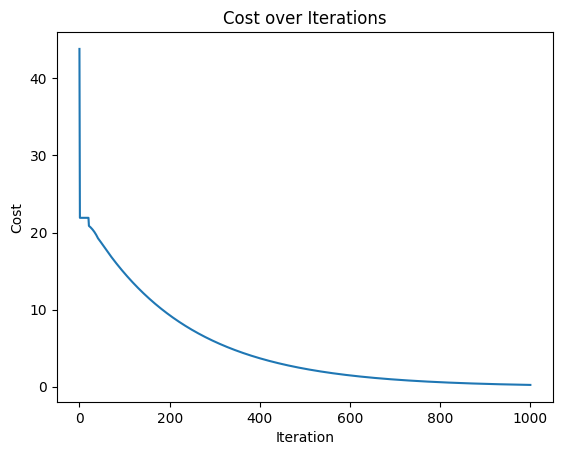

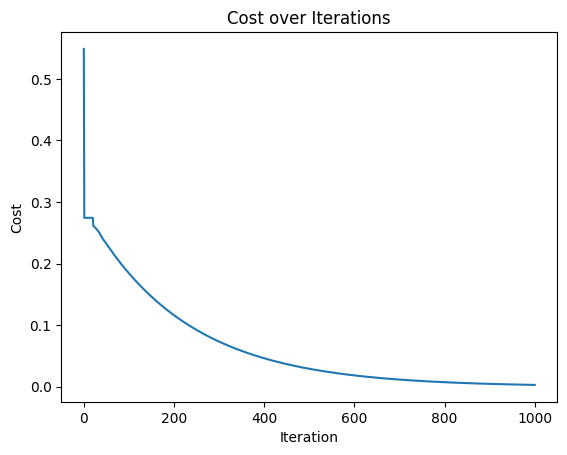

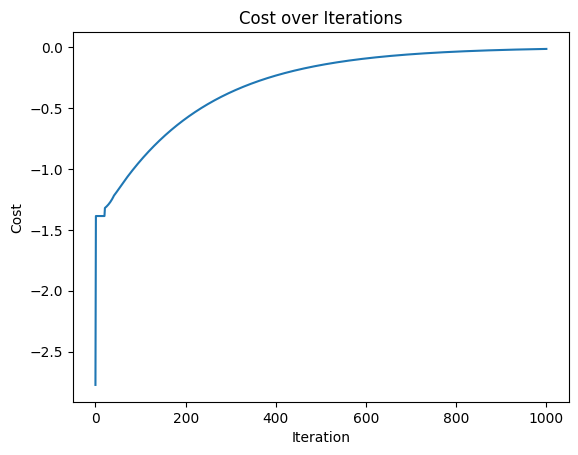

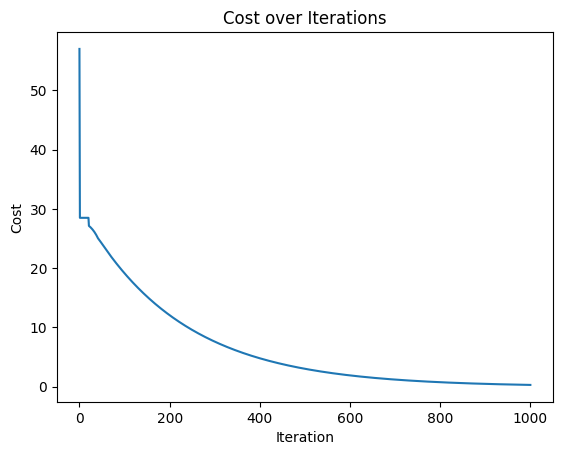

In [ ]:
for i in range(len(final_costs_list)):
    costs = final_costs_list[i][:-1]
    #print(costs)
    #print(costs[:10])
    #x=costs[:10]
    #print(gan[i].costs)
    #print(x)
    #print(np.mean(x))
    for j in range(len(costs)):
        if j<20:
            x = costs[:j+1]
            #print(x)
            mean=np.mean(x)
            costs[j]=mean
            #print(costs[j])
        else:
            costs[j] = np.mean((costs[j-20:j+1]))
    # Δημιουργία διαγράμματος
    plt.plot(range(len(costs)),costs)
    #print(gan[i].costs[:10])
    # Προσθήκη τίτλων και ετικετών
    plt.title('Cost over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()


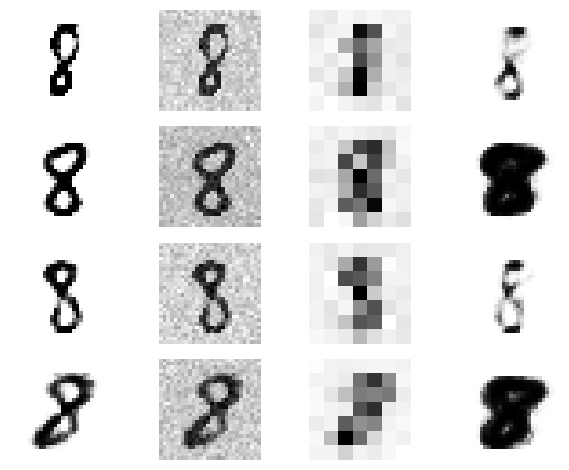

In [ ]:

# Generate images using the optimized Z
optimized_generated_images = []
num_realizations = 4
fig, axes = plt.subplots(4, 4)
for i in range(4):
    image_2d = np.reshape(Xn_split2[i], (28, 28)).T
    axes[i, 1].imshow(image_2d, cmap='gray')
    axes[i, 1].axis('off')

    image_2d = np.reshape(Xi_split2[i], (28, 28)).T
    axes[i, 0].imshow(image_2d, cmap='gray')
    axes[i, 0].axis('off')

    gan2[i].GD(lr=0.01)
    Z_opt2 = gan2[i].Z
    X = forward_NN(Z_opt2)[0]

    image_2d = np.reshape(np.dot(T3,Xn_split2[i]), (7, 7)).T
    axes[i, 2].imshow(image_2d, cmap='gray')
    axes[i, 2].axis('off')

    image_2d = np.reshape(X, (28, 28)).T
    axes[i, 3].imshow(image_2d, cmap='gray')
    axes[i, 3].axis('off')




plt.tight_layout()
plt.show()
# for i in range(4):
#     plt.plot(gan2[i].costs)
#     plt.show()

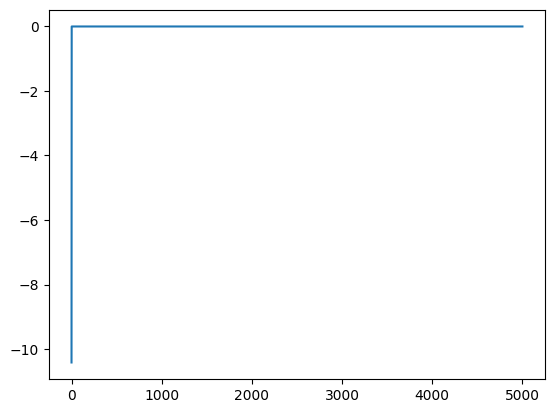

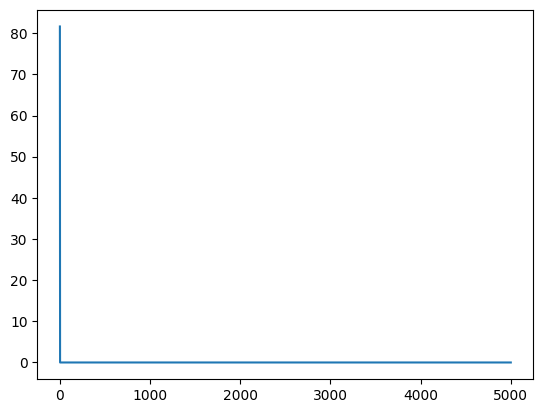

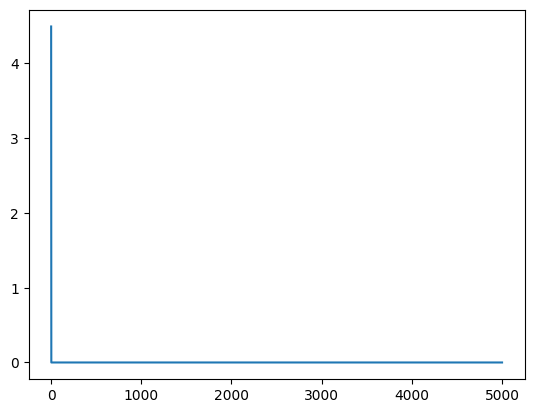

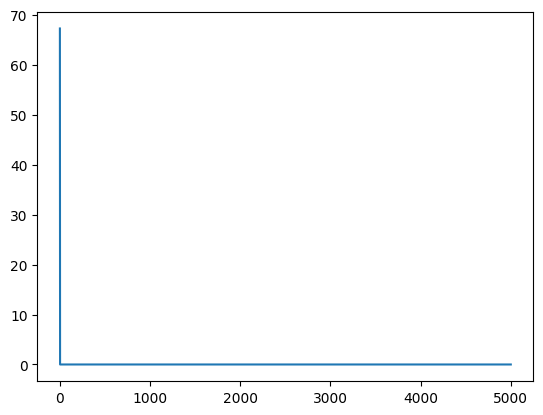

In [ ]:
for i in range(4):
    costs = gan2[i].costs
    plt.plot(range(len(costs)), costs)
    plt.show()